In [ ]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-2-e7d747fc939d>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Marine Heatwave"] = df["Marine Heatwave"].replace({False: 0, True: 1})


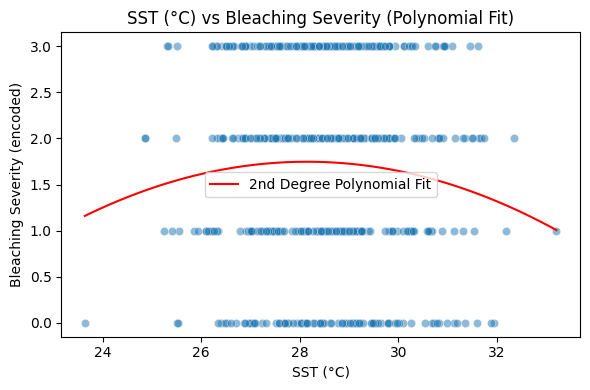

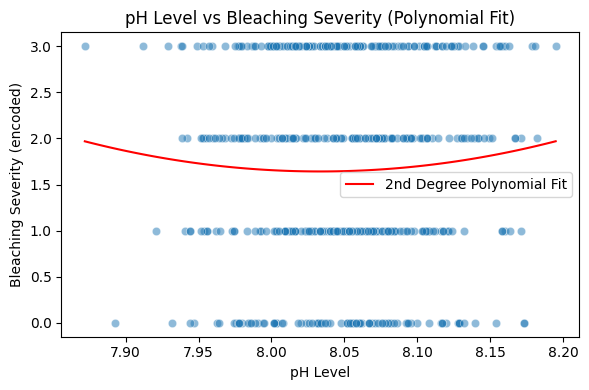

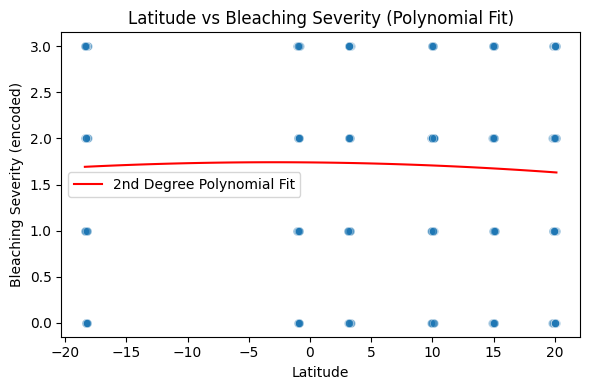

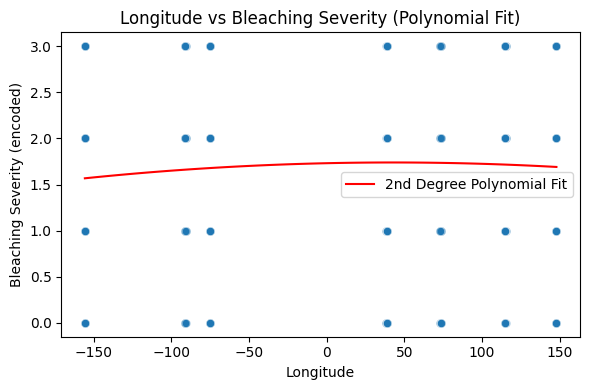

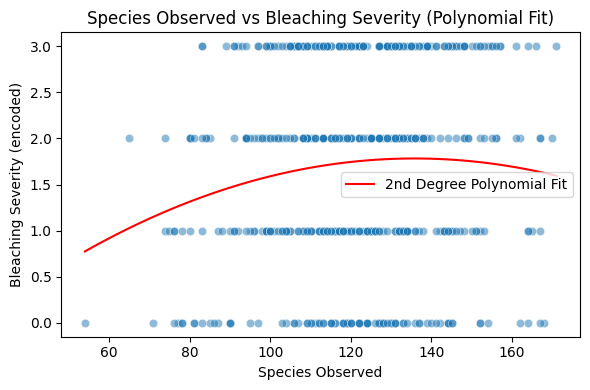

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from numpy.polynomial.polynomial import polyfit

# CSV 파일 경로 설정 (로컬 환경에 맞게 변경)
file_path = '/content/drive/MyDrive/Data Science 2025/realistic_ocean_climate_dataset.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

# 데이터 전처리
df["Marine Heatwave"] = df["Marine Heatwave"].replace({False: 0, True: 1})
df = pd.concat([df, pd.get_dummies(df["Location"], prefix="Location")], axis=1).drop(["Location"], axis=1)
df["Bleaching Severity"] = df["Bleaching Severity"].fillna("no_bleaching")
le = LabelEncoder()
df["Bleaching Severity"] = le.fit_transform(df["Bleaching Severity"].astype(str))

features = ['SST (°C)', 'pH Level', 'Latitude', 'Longitude', 'Species Observed']

# 시각화: 각 feature와 bleaching severity 간 관계
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df["Bleaching Severity"], alpha=0.5)

    x = df[feature]
    y = df["Bleaching Severity"]
    b, m1, m2 = polyfit(x, y, 2)
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = b + m1 * x_line + m2 * x_line**2

    plt.plot(x_line, y_line, color='red', label='2nd Degree Polynomial Fit')
    plt.title(f'{feature} vs Bleaching Severity (Polynomial Fit)')
    plt.xlabel(feature)
    plt.ylabel('Bleaching Severity (encoded)')
    plt.legend()
    plt.tight_layout()
    plt.show()
